<a href="https://colab.research.google.com/github/agmalaga2020/PolicySpace2_Spanish_data/blob/main/estimativas_pop_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INICIO

- 1º buscamos fuente a explorar
https://uoc0-my.sharepoint.com/:x:/g/personal/agmalaga_uoc_edu/EVrtEuZkGqxMsXz3ENcmP8sB8w9sxyyFWBX3pDP282BDaQ?e=hZX8jz

_______________________________________________________________

- 2º `CARGAMOS` DATAFRAME ORIGINAL del proyecto **github**
https://github.com/agmalaga2020/PolicySpace2-agmalaga/tree/master/input

_______________________________________________________________
- 3º Realizamos analisis exploratorio en google colab.
_______________________________________________________________

- 4º descargamos datos y creamos informe.
_______________________________________________________________

- 5º actualizar LINK de la columna `NOTEBOOK`
https://uoc0-my.sharepoint.com/:x:/g/personal/agmalaga_uoc_edu/EVrtEuZkGqxMsXz3ENcmP8sB8w9sxyyFWBX3pDP282BDaQ?e=hZX8jz

_______________________________________________________________

ESQUEMA DE PROCESO

https://whiteboard.office.com/me/whiteboards/p/c3BvOmh0dHBzOi8vdW9jMC1teS5zaGFyZXBvaW50LmNvbS9wZXJzb25hbC9hZ21hbGFnYV91b2NfZWR1/b!r4X97qYbxUyQGQNSpn-bfrNi376yDThFsrR2Kul1sxTx_nU34TfBSpdz-6pNWzvq/01E765GIPQJMS23ADWVBEID5XGUDPDSQNZ?source=applauncher&auth_upn=agmalaga%40uoc.edu

### average_num_members_families_2010

In [ ]:
import requests
import pandas as pd
import io

# Update the URL to point to the raw CSV data on GitHub
url = 'https://raw.githubusercontent.com/BAFurtado/PolicySpace2/master/input/estimativas_pop.csv'
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
print(df.head())

   mun_code       2001       2002       2003       2004       2005       2006  \
0   1302603  1451958.0  1488805.0  1527314.0  1592555.0  1644690.0  1688524.0   
1   1500800   410234.0   423325.0   437135.0   468463.0   482171.0   498095.0   
2   1501303    65385.0    66913.0    68604.0    72441.0    74120.0    76071.0   
3   1501402  1304314.0  1322683.0  1342202.0  1386482.0  1405871.0  1428368.0   
4   1501501    37025.0    38458.0    39809.0    42874.0    44216.0    45774.0   

        2008       2009       2011     2012     2013     2014     2015  \
0  1709008.0  1738641.0  1832424.0  1861838  1982177  2020301  2057711   
1   495480.0   505512.0   477999.0   483821   493976   499776   505404   
2    89909.0    92567.0   102668.0   105385   109975   112921   115779   
3  1424120.0  1437600.0  1402056.0  1410430  1425922  1432844  1439561   
4    45616.0    46611.0    52888.0    54083    56112    57393    58637   

      2016     2017     2018     2019  
0  2094391  2130264  2145444

# ESPAÑA

tenemos que extraer tabla a tabla por municipio para finalmente transformar los datos para conseeguir el mismo resultado.

### Cifras de Población por Municipio

https://www.ine.es/dynt3/inebase/es/index.htm?padre=525

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página de detalle municipal del INE
url = "https://www.ine.es/dynt3/inebase/es/index.htm?padre=525"
response = requests.get(url)
response.encoding = 'utf-8'  # Aseguramos la codificación
soup = BeautifulSoup(response.text, 'html.parser')

data = []
# Buscamos todos los enlaces que contengan "Población por municipios y sexo" en el texto
for a in soup.find_all('a'):
    text = a.get_text(strip=True)
    if "Población por municipios y sexo" in text:
        # Se asume que el nombre del municipio o entidad es la parte anterior al colon
        nombre = text.split(":")[0].strip()
        enlace = a.get('href')
        if enlace and not enlace.startswith("http"):
            # Convertir a URL absoluta si es relativa
            enlace = "https://www.ine.es" + enlace
        data.append({"Municipio": nombre, "Enlace": enlace})

# Crear un DataFrame de Pandas con los resultados
df = pd.DataFrame(data)
df.head()

,Municipio,Enlace
0,Albacete,https://www.ine.es/jaxiT3/Tabla.htm?t=2855&L=0
1,Alicante/Alacant,https://www.ine.es/jaxiT3/Tabla.htm?t=2856&L=0
2,Almería,https://www.ine.es/jaxiT3/Tabla.htm?t=2857&L=0
3,Araba/Álava,https://www.ine.es/jaxiT3/Tabla.htm?t=2854&L=0
4,Asturias,https://www.ine.es/jaxiT3/Tabla.htm?t=2886&L=0


### creamos variable table_code

In [22]:
import pandas as pd

# Supongamos que ya tienes el DataFrame df con las columnas "Municipio" y "Enlace"
# Creamos una nueva columna "table_code" extrayendo el número que aparece tras "t="

df['table_code'] = df['Enlace'].str.extract(r't=(\d+)')

df.head()

,Municipio,Enlace,table_code
0,Albacete,https://www.ine.es/jaxiT3/Tabla.htm?t=2855&L=0,2855
1,Alicante/Alacant,https://www.ine.es/jaxiT3/Tabla.htm?t=2856&L=0,2856
2,Almería,https://www.ine.es/jaxiT3/Tabla.htm?t=2857&L=0,2857
3,Araba/Álava,https://www.ine.es/jaxiT3/Tabla.htm?t=2854&L=0,2854
4,Asturias,https://www.ine.es/jaxiT3/Tabla.htm?t=2886&L=0,2886


### extraemos las tablas

In [23]:
import requests
import pandas as pd

# Supongamos que ya tienes el DataFrame 'df' con la columna "table_code"
# Ejemplo de df:
#   Municipio           Enlace                                             table_code
# 0  Albacete  https://www.ine.es/jaxiT3/Tabla.htm?t=2855&L=0                    2855
# 1  Alicante/Alacant  https://www.ine.es/jaxiT3/Tabla.htm?t=2856&L=0                2856
# ...

for idx, code in df['table_code'].items():
    url_csv = f"https://servicios.ine.es/wstempus/csv/ES/DATOS_TABLA/{code}?nult=999"
    response = requests.get(url_csv)

    if response.status_code == 200:
        csv_data = response.content.decode('utf-8')
        filename = f"tabla_{code}.csv"

        with open(filename, "w", encoding="utf-8") as f:
            f.write(csv_data)
        print(f"Archivo CSV guardado como '{filename}' para table_code {code}")

        # Opcional: Leer y mostrar los primeros registros de la tabla
        tabla_df = pd.read_csv(filename, sep='\t', encoding='utf-8')
        print("Primeros registros de la tabla:")
        print(tabla_df.head())
        print("-" * 50)
    else:
        print(f"Error en la petición para table_code {code}: {response.status_code}")


Archivo CSV guardado como 'tabla_2855.csv' para table_code 2855
Primeros registros de la tabla:
        Municipios   Sexo  Periodo  Total
0  02001 Abengibre  Total     2024  759.0
1  02001 Abengibre  Total     2023  760.0
2  02001 Abengibre  Total     2022  739.0
3  02001 Abengibre  Total     2021  748.0
4  02001 Abengibre  Total     2020  761.0
--------------------------------------------------
Archivo CSV guardado como 'tabla_2856.csv' para table_code 2856
Primeros registros de la tabla:
    Municipios   Sexo  Periodo  Total
0  03002 Agost  Total     2024  5.107
1  03002 Agost  Total     2023  5.067
2  03002 Agost  Total     2022  4.948
3  03002 Agost  Total     2021  4.906
4  03002 Agost  Total     2020  4.794
--------------------------------------------------
Archivo CSV guardado como 'tabla_2857.csv' para table_code 2857
Primeros registros de la tabla:
   Municipios   Sexo  Periodo  Total
0  04001 Abla  Total     2024  1.272
1  04001 Abla  Total     2023  1.255
2  04001 Abla  Tota

### Unimos tablas

In [24]:
import os
import glob
import pandas as pd

# Directorio donde se encuentran los archivos CSV
directorio = "/content/"
# Patrón para encontrar los archivos que empiezan con "tabla_"
patron = os.path.join(directorio, "tabla_*.csv")

# Obtenemos la lista de archivos que coinciden
archivos = glob.glob(patron)
print("Archivos encontrados:", archivos)

# Lista para almacenar cada DataFrame
lista_df = []

for archivo in archivos:
    # Extraer el table_code a partir del nombre del archivo
    # Se asume que el nombre es del tipo "tabla_<table_code>.csv"
    nombre_archivo = os.path.basename(archivo)  # Ej: "tabla_2855.csv"
    table_code = nombre_archivo.split('_')[1].split('.')[0]

    # Leer el archivo CSV; se asume que el separador es tabulador y codificación UTF-8
    df_temp = pd.read_csv(archivo, sep='\t', encoding='utf-8')

    # Agregar una columna con el código de tabla para referencia
    df_temp['table_code'] = table_code

    lista_df.append(df_temp)

# Unir todos los DataFrames verticalmente
df_unido = pd.concat(lista_df, ignore_index=True)

print("Vista previa del DataFrame unido:")
print(df_unido.head())


Archivos encontrados: ['/content/tabla_2883.csv', '/content/tabla_2874.csv', '/content/tabla_2878.csv', '/content/tabla_2871.csv', '/content/tabla_2899.csv', '/content/tabla_2879.csv', '/content/tabla_2860.csv', '/content/tabla_2906.csv', '/content/tabla_2861.csv', '/content/tabla_2864.csv', '/content/tabla_2891.csv', '/content/tabla_2905.csv', '/content/tabla_2869.csv', '/content/tabla_2863.csv', '/content/tabla_2876.csv', '/content/tabla_2889.csv', '/content/tabla_2881.csv', '/content/tabla_2893.csv', '/content/tabla_2902.csv', '/content/tabla_2857.csv', '/content/tabla_2909.csv', '/content/tabla_2886.csv', '/content/tabla_2892.csv', '/content/tabla_2885.csv', '/content/tabla_2870.csv', '/content/tabla_2908.csv', '/content/tabla_2904.csv', '/content/tabla_2858.csv', '/content/tabla_2896.csv', '/content/tabla_2890.csv', '/content/tabla_2859.csv', '/content/tabla_2907.csv', '/content/tabla_2865.csv', '/content/tabla_2854.csv', '/content/tabla_2894.csv', '/content/tabla_2855.csv', '/con

In [25]:
len(df_unido.Municipios.unique()) # 8188 test

8188

### Creamos la carpeta preprocesados si no existe


In [26]:
# Creamos la carpeta preprocesados si no existe
if not os.path.exists('preprocesados'):
    os.makedirs('preprocesados')

# Guardamos el DataFrame unido en un archivo CSV dentro de la carpeta preprocesados
df_unido.to_csv('preprocesados/df_unido.csv', index=False)
print("DataFrame unido guardado en preprocesados/df_unido.csv")


DataFrame unido guardado en preprocesados/df_unido.csv


### seleccionamos solo total de la columna SEXO creamos mun_code y Municipios_name

In [27]:
import pandas as pd

# Leer la tabla descargada (asegúrate de que el separador y la codificación sean los correctos)
df = pd.read_csv("/content/preprocesados/df_unido.csv", sep=",", encoding="utf-8")

# Filtrar solo las filas donde la columna 'Sexo' es 'Total'
df = df[df['Sexo'] == 'Total']

# Determinar la columna que contiene el código y el nombre del municipio.
# Se asume que puede llamarse "Código" o "Municipio", y si no existe, se toma la primera columna.
col = None
for candidate in ["Código", "Municipio"]:
    if candidate in df.columns:
        col = candidate
        break
if col is None:
    col = df.columns[0]

# Mostrar las primeras filas para ver cómo está el contenido antes de dividir
print("Antes de dividir:")
print(df.head())

# Dividir la columna en dos nuevas columnas: "mun_code" y "Municipios_name".
# Se asume que el valor es de la forma "código nombre" y se divide en el primer espacio.
df[['mun_code', 'Municipios_name']] = df[col].astype(str).str.split(" ", n=1, expand=True)

# Opcional: reorganizar las columnas para mayor claridad
cols = list(df.columns)
# Por ejemplo, mover las nuevas columnas al inicio
cols_new = ['mun_code', 'Municipios_name'] + [c for c in cols if c not in ['mun_code', 'Municipios_name']]
df = df[cols_new]

print("\nDespués de dividir y filtrar:")
print(df.head())

Antes de dividir:
       Municipios   Sexo  Periodo  Total  table_code
0  30001 Abanilla  Total     2024  6.206        2883
1  30001 Abanilla  Total     2023  6.216        2883
2  30001 Abanilla  Total     2022  6.146        2883
3  30001 Abanilla  Total     2021  6.116        2883
4  30001 Abanilla  Total     2020  6.097        2883

Después de dividir y filtrar:
  mun_code Municipios_name      Municipios   Sexo  Periodo  Total  table_code
0    30001        Abanilla  30001 Abanilla  Total     2024  6.206        2883
1    30001        Abanilla  30001 Abanilla  Total     2023  6.216        2883
2    30001        Abanilla  30001 Abanilla  Total     2022  6.146        2883
3    30001        Abanilla  30001 Abanilla  Total     2021  6.116        2883
4    30001        Abanilla  30001 Abanilla  Total     2020  6.097        2883


In [28]:
# Creamos la carpeta preprocesados si no existe
if not os.path.exists('preprocesados'):
    os.makedirs('preprocesados')

# Guardamos el DataFrame unido en un archivo CSV dentro de la carpeta preprocesados
df_unido.to_csv('preprocesados/df_unido2.csv', index=False)
print("DataFrame unido guardado en preprocesados/df_unido2.csv")

DataFrame unido guardado en preprocesados/df_unido2.csv


In [29]:
# prompt: mostramos el listado completo de Municipios diferentes pero que se muestre completo por pantalla como listado

# Assuming df is your DataFrame with the 'Municipios_name' column
municipios_list = df['Municipios_name'].unique().tolist()
print("valores unicos en Municipios_name" ,len(municipios_list) ) # 8131 test
print("numero total en Municipios_name",len(df_unido.Municipios.unique()) )# 8188 test

valores unicos en Municipios_name 8131
numero total en Municipios_name 8188


In [30]:
# prompt: df mostramos porcentajes de nan

# Calcula el porcentaje de valores NaN en cada columna del DataFrame df
percentage_nan = df.isnull().mean() * 100

# Imprime los resultados
print("Porcentaje de valores NaN en cada columna:")
print(percentage_nan) # control Total 3.685798



Porcentaje de valores NaN en cada columna:
mun_code           0.000000
Municipios_name    0.000000
Municipios         0.000000
Sexo               0.000000
Periodo            0.000000
Total              3.685798
table_code         0.000000
dtype: float64


In [31]:
# identificamos las filas que tienen nan y las mostramos

import pandas as pd

# Assuming df is your DataFrame
rows_with_nan = df[df.isnull().any(axis=1)]
print("Rows with NaN values:")
rows_with_nan


Rows with NaN values:


,mun_code,Municipios_name,Municipios,Sexo,Periodo,Total,table_code
27,30001,Abanilla,30001 Abanilla,Total,1997,NaN,2883
114,30002,Abarán,30002 Abarán,Total,1997,NaN,2883
201,30004,Albudeite,30004 Albudeite,Total,1997,NaN,2883
288,30005,Alcantarilla,30005 Alcantarilla,Total,1997,NaN,2883
375,30902,"Alcázares, Los","30902 Alcázares, Los",Total,1997,NaN,2883
...,...,...,...,...,...,...,...
711948,34241,Villodre,34241 Villodre,Total,1997,NaN,2888
712035,34242,Villodrigo,34242 Villodrigo,Total,1997,NaN,2888
712122,34243,Villoldo,34243 Villoldo,Total,1997,NaN,2888
712209,34245,Villota del Páramo,34245 Villota del Páramo,Total,1997,NaN,2888


In [32]:
# imprimimos valores unicos de la columna Periodo  de rows_with_nan

# Assuming df is your DataFrame with the 'Periodo' column
periodos_list = rows_with_nan['Periodo'].unique().tolist()
print("Valores únicos en la columna Periodo:", periodos_list)


Valores únicos en la columna Periodo: [1997, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1996, 2023, 2022, 2021, 2020, 2019, 2024]


In [33]:
# prompt: imprime un mensaje que diga en una sola linea tenemos en percentage_nan.Total porciento en la columna Total, vamos a eliminar estas filas con nan

print(f"En la columna Total, tenemos un {percentage_nan.Total:.2f}% de valores NaN. Vamos a eliminar estas filas con NaN.")
# control: En la columna Total, tenemos un 3.69% de valores NaN. Vamos a eliminar estas filas con NaN.

En la columna Total, tenemos un 3.69% de valores NaN. Vamos a eliminar estas filas con NaN.


### eliminamos las filas (DESCARTAMOS ESTE PASO) ⚠️⚠️

In [34]:
# eliminamos las filas

# Assuming df is your DataFrame with NaN values
# df = df.dropna(subset=['Total'])

# Print the updated DataFrame (optional)
# print("DataFrame after removing rows with NaN in 'Total' column:")
# print(df.head())

# Creamos la carpeta preprocesados si no existe
# if not os.path.exists('preprocesados'):
#     os.makedirs('preprocesados')

# Guardamos el DataFrame unido en un archivo CSV dentro de la carpeta preprocesados
# df.to_csv('preprocesados/df_unido3.csv', index=False)
# print("DataFrame unido guardado en preprocesados/df_unido3.csv")


In [35]:
## (DESCARTAMOS ESTE PASO) ⚠️⚠️


# mostramos porcentajes de nan nuevamente
municipios_list = df['Municipios_name'].unique().tolist()
print("valores unicos en Municipios_name" ,len(municipios_list) ) # 8131 test
print("numero total en Municipios_name",len(df_unido.Municipios.unique()) )# 8188 test

# Calcula el porcentaje de valores NaN en cada columna del DataFrame df
percentage_nan = df.isnull().mean() * 100

# Imprime los resultados
print ("## (DESCARTAMOS ESTE PASO) ⚠️⚠️")
print("Porcentaje de valores NaN en cada columna: ")
percentage_nan


valores unicos en Municipios_name 8131
numero total en Municipios_name 8188
## (DESCARTAMOS ESTE PASO) ⚠️⚠️
Porcentaje de valores NaN en cada columna: 


,0
mun_code,0.000000
Municipios_name,0.000000
Municipios,0.000000
Sexo,0.000000
Periodo,0.000000
Total,3.685798
table_code,0.000000


# pausa

### pivotamos

In [37]:
# ahora vamos a crear un que solo tenga mun_code y las cifras totales y las fechas como variables, es decir tendremos num_code y las fechas como variables, tantas variables como fechas dispongamos

# Cargar el DataFrame desde el archivo CSV
df = df

# Crear un DataFrame con solo mun_code, Total y las fechas como columnas
df_pivot = df.pivot(index='mun_code', columns='Periodo', values='Total')

# Restablecer el índice para que mun_code sea una columna
df_pivot = df_pivot.reset_index()

print(df_pivot.head())

# Guardar el nuevo DataFrame en un archivo CSV
df_pivot.to_csv('preprocesados/df_pivot.csv', index=False)
print("DataFrame pivot guardado en preprocesados/df_pivot.csv")


Periodo mun_code     1996 1997     1998     1999     2000     2001    2002  \
0             01  281.821  NaN  284.595  285.748  286.497  288.793  291.86   
1          01001    1.234  NaN    1.259    1.329    1.401    1.486   1.598   
2          01002    9.758  NaN    9.753    9.753     9.72    9.695   9.594   
3          01003    1.345  NaN    1.365    1.373    1.416    1.447   1.479   
4          01004    1.293  NaN    1.317    1.338    1.338    1.331   1.339   

Periodo    2003     2004  ...     2015     2016     2017     2018     2019  \
0        294.36  295.905  ...  323.648  324.126  326.574  328.868  331.549   
1         1.707    1.919  ...    2.882    2.856    2.913    2.887    2.876   
2         9.555    9.512  ...   10.263    10.26   10.291   10.286    10.35   
3         1.489    1.487  ...    1.518    1.502    1.496    1.483    1.467   
4         1.381    1.451  ...    1.829     1.84    1.829    1.831    1.821   

Periodo    2020     2021     2022     2023     2024  
0       

In [38]:
df_pivot.head()

Periodo,mun_code,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,01,281.821,NaN,284.595,285.748,286.497,288.793,291.86,294.36,295.905,...,323.648,324.126,326.574,328.868,331.549,333.94,333.626,334.412,336.686,339.137
1,01001,1.234,NaN,1.259,1.329,1.401,1.486,1.598,1.707,1.919,...,2.882,2.856,2.913,2.887,2.876,2.935,2.925,2.96,2.975,2.971
2,01002,9.758,NaN,9.753,9.753,9.72,9.695,9.594,9.555,9.512,...,10.263,10.26,10.291,10.286,10.35,10.264,10.307,10.281,10.313,10.33
3,01003,1.345,NaN,1.365,1.373,1.416,1.447,1.479,1.489,1.487,...,1.518,1.502,1.496,1.483,1.467,1.442,1.456,1.431,1.409,1.381
4,01004,1.293,NaN,1.317,1.338,1.338,1.331,1.339,1.381,1.451,...,1.829,1.84,1.829,1.831,1.821,1.8,1.809,1.81,1.832,1.856


In [39]:
import pandas as pd

# Cargar el DataFrame desde el archivo CSV
df_pivot = pd.read_csv('/content/preprocesados/df_pivot.csv')

# Calcular el porcentaje de valores NaN por fecha
nan_percentage_by_date = df_pivot.isnull().mean() * 100

# Mostrar el porcentaje de NaN por fecha
print("Porcentaje de valores NaN por fecha:")
print(nan_percentage_by_date)

# Calcular el recuento total de valores NaN en el DataFrame
total_nan_count = df_pivot.isnull().sum().sum()

# Calcular el porcentaje de valores NaN en relación al total de valores en el DataFrame
total_values = df_pivot.size
total_nan_percentage = (total_nan_count / total_values) * 100

# Mostrar el recuento total de valores NaN y su porcentaje
print("\nRecuento total de valores NaN:", total_nan_count)
print("Porcentaje total de valores NaN:", total_nan_percentage)


Porcentaje de valores NaN por fecha:
mun_code      0.000000
1996          0.488520
1997        100.000000
1998          0.464094
1999          0.427455
2000          0.390816
2001          0.354177
2002          0.341964
2003          0.341964
2004          0.329751
2005          0.329751
2006          0.317538
2007          0.305325
2008          0.293112
2009          0.293112
2010          0.268686
2011          0.244260
2012          0.244260
2013          0.232047
2014          0.232047
2015          0.207621
2016          0.134343
2017          0.146556
2018          0.146556
2019          0.061065
2020          0.061065
2021          0.061065
2022          0.061065
2023          0.061065
2024          0.048852
dtype: float64

Recuento total de valores NaN: 8752
Porcentaje total de valores NaN: 3.5629376323074418


In [40]:
df_pivot.columns

Index(['mun_code', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024'],
      dtype='object')

In [41]:
# Cargar el DataFrame desde el archivo CSV
df_pivot = pd.read_csv('/content/preprocesados/df_pivot.csv')

# Creamos una copia para trabajar
df_pivot_numerico = df_pivot.copy()

# Reemplazar puntos por nada y comas por punto en todas las columnas
df_pivot_numerico = df_pivot_numerico.applymap(lambda x: str(x).replace('.', '').replace(',', '.') if isinstance(x, str) else x)

# Convertir todas las columnas a numérico (float), forzando coerción de errores
df_pivot_numerico = df_pivot_numerico.apply(pd.to_numeric, errors='coerce')

# Comprobamos el tipo de datos resultantes
tipos_datos = df_pivot_numerico.dtypes
print(tipos_datos)


# Convertimos solo las columnas numéricas (excepto 'mun_code') con reemplazo adecuado
for col in df_pivot.columns[1:]:  # omitimos 'mun_code'
    df_pivot[col] = df_pivot[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

# Convertimos todo a numérico (excepto 'mun_code')
df_pivot_numerico = df_pivot.copy()
for col in df_pivot_numerico.columns[1:]:
    df_pivot_numerico[col] = pd.to_numeric(df_pivot_numerico[col], errors='coerce')

# Revisamos los tipos de datos
print(df_pivot_numerico.dtypes)


<ipython-input-41-1c9209cb1f46>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_pivot_numerico = df_pivot_numerico.applymap(lambda x: str(x).replace('.', '').replace(',', '.') if isinstance(x, str) else x)


mun_code      int64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
2020        float64
2021        float64
2022        float64
2023        float64
2024        float64
dtype: object
mun_code      int64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
2014  

In [42]:
# guardamos df_pivot_numerico

# Guardar df_pivot_numerico en un archivo (opcional)
df_pivot_numerico.to_csv('preprocesados/df_pivot_numerico.csv', index=False)
print("DataFrame df_pivot_numerico guardado en preprocesados/df_pivot_numerico.csv")


DataFrame df_pivot_numerico guardado en preprocesados/df_pivot_numerico.csv


### mostramos OUTLIERS

In [43]:
# Cargar el DataFrame desde el archivo CSV
df_pivot_numerico = pd.read_csv('/content/preprocesados/df_pivot_numerico.csv')

# Calcular el número de filas en el DataFrame
num_rows = df_pivot_numerico.shape[0]

# Mostrar el número de filas
print("Número de filas en el DataFrame df_pivot_numerico:", num_rows)


Número de filas en el DataFrame df_pivot_numerico: 8188


#### graficamos test 50903

     Año  Población
0   1996        NaN
1   1997        NaN
2   1998        NaN
3   1999        NaN
4   2000        NaN
5   2001        NaN
6   2002        NaN
7   2003        NaN
8   2004        NaN
9   2005        NaN
10  2006        NaN
11  2007     2849.0
12  2008     2878.0
13  2009     2868.0
14  2010     2888.0
15  2011     2885.0
16  2012     2838.0
17  2013     2837.0
18  2014      282.0
19  2015     2793.0
20  2016     2753.0
21  2017     2721.0
22  2018     2696.0
23  2019      272.0
24  2020     2745.0
25  2021     2768.0
26  2022     2827.0
27  2023     2866.0
28  2024     2854.0


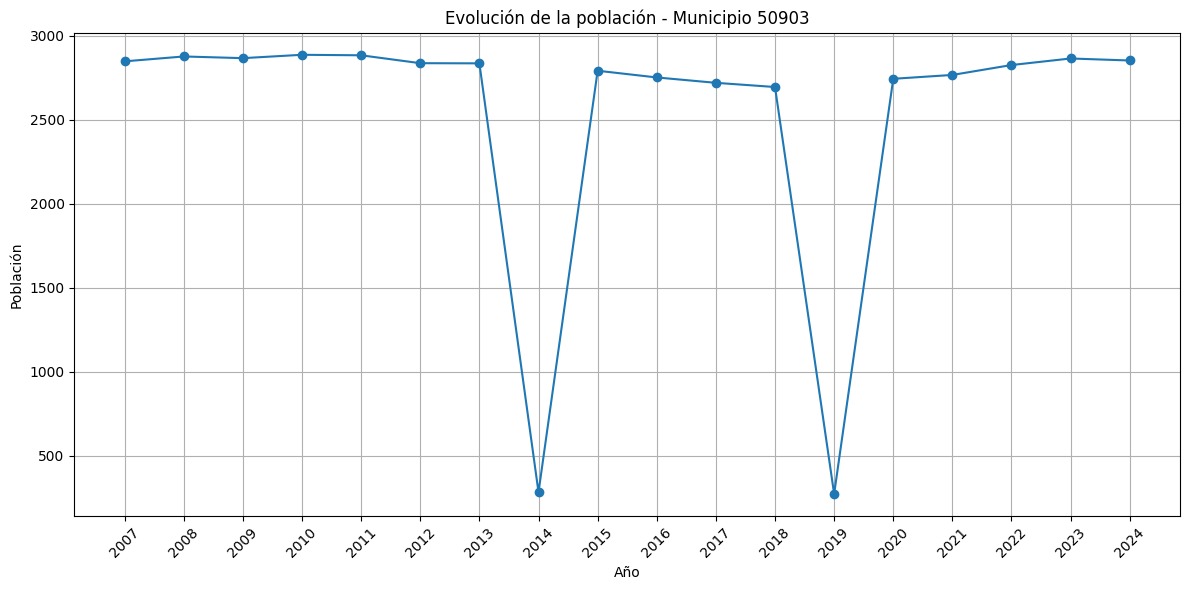

In [44]:
import matplotlib.pyplot as plt

# Filtrar por el municipio con código 50903
municipio_50903 = df_pivot_numerico[df_pivot_numerico['mun_code'] == 50903]

# Transponer para graficar correctamente
serie_50903 = municipio_50903.drop(columns='mun_code').T
serie_50903.columns = ['Población']
serie_50903.reset_index(inplace=True)
serie_50903.columns = ['Año', 'Población']
serie_50903['Año'] = serie_50903['Año'].astype(str)

# Mostrar los valores
print(serie_50903)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(serie_50903['Año'], serie_50903['Población'], marker='o')
plt.title("Evolución de la población - Municipio 50903")
plt.xlabel("Año")
plt.ylabel("Población")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### codigo para la detección de outliers test 50903

In [45]:
# Usamos el método IQR (rango intercuartílico) para detectar outliers
Q1 = serie_50903['Población'].quantile(0.25)
Q3 = serie_50903['Población'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
serie_50903['Es_outlier'] = (
    (serie_50903['Población'] < limite_inferior) |
    (serie_50903['Población'] > limite_superior)
)

# Mostrar los valores que son outliers
outliers_detectados = serie_50903[serie_50903['Es_outlier'] == True]
outliers_detectados

,Año,Población,Es_outlier
18,2014,282.0,True
23,2019,272.0,True


In [46]:
# Creamos una copia del DataFrame para análisis de outliers
df_outliers = df_pivot_numerico.copy()

# Aplicamos detección de outliers fila por fila (por municipio) usando IQR
def detectar_outliers_fila(fila):
    valores = fila[1:]  # excluir 'mun_code'
    Q1 = valores.quantile(0.25)
    Q3 = valores.quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    return ((valores < limite_inf) | (valores > limite_sup)).sum()


# Aplicamos a cada fila y contamos cuántos outliers tiene cada municipio
df_outliers['num_outliers'] = df_outliers.apply(detectar_outliers_fila, axis=1)

# Filtrar municipios que tengan al menos un outlier
municipios_con_outliers = df_outliers[df_outliers['num_outliers'] > 0][['mun_code', 'num_outliers']]
municipios_con_outliers


,mun_code,num_outliers
0,1,3
2,1002,5
3,1003,1
4,1004,3
6,1008,4
...,...,...
8183,50903,2
8184,51,1
8185,51001,1
8186,52,4


In [47]:
total_outliers = municipios_con_outliers['num_outliers'].sum()

print(f"La suma total de 'num_outliers' en municipios_con_outliers es: {total_outliers}")
# v1 = La suma total de 'num_outliers' en municipios_con_outliers es: 7409
# v2 = La suma total de 'num_outliers' en municipios_con_outliers es: 7409

La suma total de 'num_outliers' en municipios_con_outliers es: 7409


### Corregimos outliers. primera parte

In [49]:
import pandas as pd

# Definición de la función faltante

def contar_outliers(fila):
    valores = fila[1:]  # excluir 'mun_code'
    Q1 = valores.quantile(0.25)
    Q3 = valores.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return ((valores < lim_inf) | (valores > lim_sup)).sum()

# Función para corregir outliers sin usar otros outliers como vecinos

def corregir_outliers_vecinos_excluyendo_outliers(fila, n_max=5):
    codigo = fila['mun_code']
    valores = fila[1:].copy()  # excluir 'mun_code'
    index = valores.index

    # Detectar outliers en la fila
    Q1 = valores.quantile(0.25)
    Q3 = valores.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outlier_mask = (valores < lim_inf) | (valores > lim_sup)
    outliers_idx = valores[outlier_mask].index

    # Reemplazar cada outlier con media de vecinos válidos que NO sean outliers
    for idx in outliers_idx:
        pos = index.get_loc(idx)

        for n in range(1, n_max + 1):
            izquierda = valores.iloc[max(0, pos - n):pos]
            derecha = valores.iloc[pos + 1:pos + 1 + n]

            # Excluir vecinos que también son outliers
            izquierda = izquierda[~outlier_mask.iloc[max(0, pos - n):pos]]
            derecha = derecha[~outlier_mask.iloc[pos + 1:pos + 1 + n]]

            vecinos_validos = pd.concat([izquierda, derecha]).dropna()

            if len(vecinos_validos) >= 2:  # mínimo un valor a cada lado
                valores.iloc[pos] = vecinos_validos.mean()
                break

    return pd.concat([pd.Series({'mun_code': codigo}), valores])

# Aplicar la nueva versión de la corrección
df_outliers_puros_corregidos = df_pivot_numerico.apply(
    lambda fila: corregir_outliers_vecinos_excluyendo_outliers(fila, n_max=5), axis=1)

# Volver a contar outliers tras esta corrección más estricta
df_outliers_puros_corregidos['num_outliers'] = df_outliers_puros_corregidos.apply(contar_outliers, axis=1)
outliers_filtrados = df_outliers_puros_corregidos[df_outliers_puros_corregidos['num_outliers'] > 0][['mun_code', 'num_outliers']]
total_outliers_puros = outliers_filtrados['num_outliers'].sum()

print(total_outliers_puros)


748


In [50]:
df_outliers_puros_corregidos.to_csv('preprocesados/df_outliers_puros_corregidos.csv', index=False)
print("DataFrame df_outliers_puros_corregidos guardado en preprocesados/df_outliers_puros_corregidos.csv")


DataFrame df_outliers_puros_corregidos guardado en preprocesados/df_outliers_puros_corregidos.csv


#### graficamos test 50903

             Año    Población
0           1996  2877.000000
1           1997          NaN
2           1998  2813.000000
3           1999  2839.000000
4           2000  2768.000000
5           2001  2793.000000
6           2002  2739.333333
7           2003  2687.000000
8           2004  2657.000000
9           2005  2611.000000
10          2006  2714.000000
11          2007  2819.000000
12          2008  2814.000000
13          2009  2826.000000
14          2010  2795.000000
15          2011  2797.000000
16          2012  2777.500000
17          2013  2758.000000
18          2014  2717.000000
19          2015  2692.000000
20          2016  2685.500000
21          2017  2679.000000
22          2018  2645.000000
23          2019  2623.000000
24          2020  2601.000000
25          2021  2575.000000
26          2022  2553.000000
27          2023  2538.000000
28          2024  2542.000000
29  num_outliers     0.000000


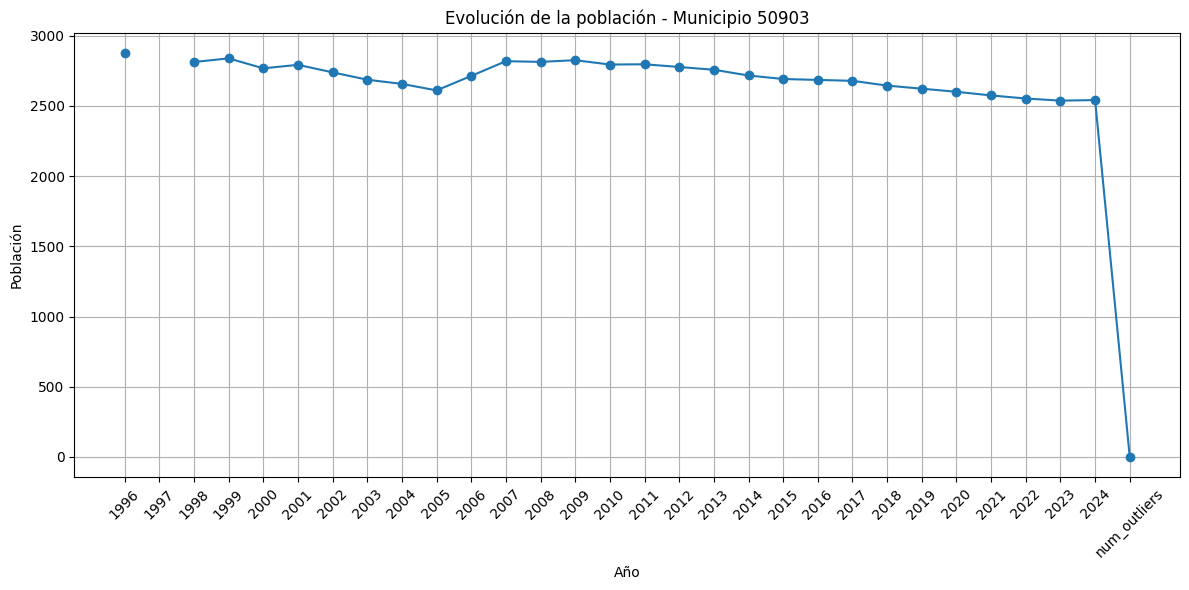

In [51]:
import matplotlib.pyplot as plt

# Filtrar por el municipio con código 50903
municipio_50903 = df_outliers_puros_corregidos[df_outliers_puros_corregidos['mun_code'] == 6126.0]

# Transponer para graficar correctamente
serie_50903 = municipio_50903.drop(columns='mun_code').T
serie_50903.columns = ['Población']
serie_50903.reset_index(inplace=True)
serie_50903.columns = ['Año', 'Población']
serie_50903['Año'] = serie_50903['Año'].astype(str)

# Mostrar los valores
print(serie_50903)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(serie_50903['Año'], serie_50903['Población'], marker='o')
plt.title("Evolución de la población - Municipio 50903")
plt.xlabel("Año")
plt.ylabel("Población")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
# Assuming df_correccion_vecinos is your DataFrame
df_filtrado = df_outliers_puros_corregidos[df_outliers_puros_corregidos['mun_code'] == 1.0]

# Print the filtered DataFrame (optional)
df_filtrado


,mun_code,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,num_outliers
0,1.0,281821.0,NaN,284595.0,285748.0,286497.0,288793.0,290398.333333,294885.0,295905.0,...,324126.0,326574.0,328868.0,331549.0,332587.5,333626.0,334412.0,336686.0,339137.0,0


             Año  Población
0           1996     1420.0
1           1997        NaN
2           1998     1460.0
3           1999     1400.0
4           2000     1390.0
5           2001     1350.0
6           2002     1300.0
7           2003     1270.0
8           2004     1250.0
9           2005     1250.0
10          2006     1290.0
11          2007     1430.0
12          2008     1360.0
13          2009     1310.0
14          2010     1290.0
15          2011     1240.0
16          2012     1190.0
17          2013     1170.0
18          2014     1140.0
19          2015     1110.0
20          2016     1140.0
21          2017     1130.0
22          2018     1150.0
23          2019     1160.0
24          2020     1070.0
25          2021     1000.0
26          2022      920.0
27          2023      920.0
28          2024      920.0
29  num_outliers        0.0


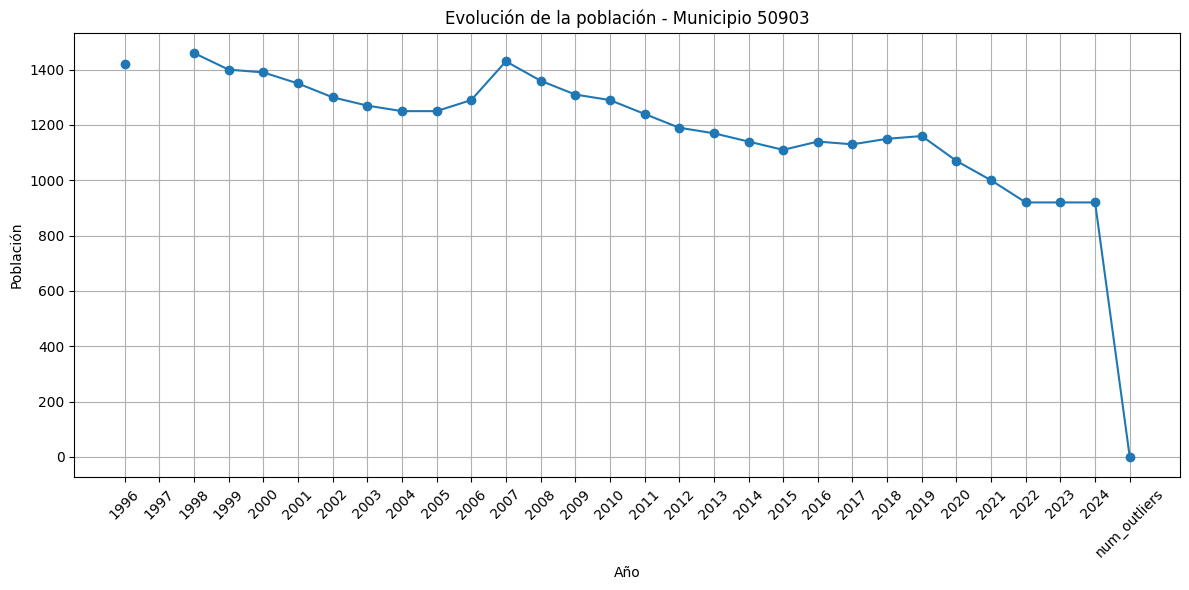

In [53]:
import matplotlib.pyplot as plt

# Filtrar por el municipio con código 50903
municipio_50903 = df_outliers_puros_corregidos[df_outliers_puros_corregidos['mun_code'] == 5267]

# Transponer para graficar correctamente
serie_50903 = municipio_50903.drop(columns='mun_code').T
serie_50903.columns = ['Población']
serie_50903.reset_index(inplace=True)
serie_50903.columns = ['Año', 'Población']
serie_50903['Año'] = serie_50903['Año'].astype(str)

# Mostrar los valores
print(serie_50903)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(serie_50903['Año'], serie_50903['Población'], marker='o')
plt.title("Evolución de la población - Municipio 50903")
plt.xlabel("Año")
plt.ylabel("Población")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
# Calcular el porcentaje de valores NaN por fecha
nan_percentage_by_date = df_outliers_puros_corregidos.isnull().mean() * 100

# Mostrar el porcentaje de NaN por fecha
print("Porcentaje de valores NaN por fecha:")
print(nan_percentage_by_date)

Porcentaje de valores NaN por fecha:
mun_code          0.000000
1996              0.488520
1997            100.000000
1998              0.464094
1999              0.427455
2000              0.390816
2001              0.354177
2002              0.341964
2003              0.341964
2004              0.329751
2005              0.329751
2006              0.317538
2007              0.305325
2008              0.293112
2009              0.293112
2010              0.268686
2011              0.244260
2012              0.244260
2013              0.232047
2014              0.232047
2015              0.207621
2016              0.134343
2017              0.146556
2018              0.146556
2019              0.061065
2020              0.061065
2021              0.061065
2022              0.061065
2023              0.061065
2024              0.048852
num_outliers      0.000000
dtype: float64


In [55]:
total_nan_count = df_outliers_puros_corregidos.isnull().sum().sum()

# Calcular el porcentaje de valores NaN en relación al total de valores en el DataFrame
total_values = df_outliers_puros_corregidos.size
total_nan_percentage = (total_nan_count / total_values) * 100

# Mostrar el recuento total de valores NaN y su porcentaje
print("\nRecuento total de valores NaN en df_outliers_puros_corregidos:", total_nan_count)
print("Porcentaje total de valores NaN en df_outliers_puros_corregidos:", total_nan_percentage)


Recuento total de valores NaN en df_outliers_puros_corregidos: 8752
Porcentaje total de valores NaN en df_outliers_puros_corregidos: 3.448004160297524


### municipios con mas de 6 NAN

In [56]:
# Calcular el número de valores NaN en cada fila
nan_counts_per_row = df_outliers_puros_corregidos.isnull().sum(axis=1)

# Filtrar las filas que tienen más de 6 valores NaN
rows_with_more_than_6_nans = df_outliers_puros_corregidos[nan_counts_per_row > 6]

# Mostrar las filas que tienen más de 6 valores NaN
print("Filas con más de 6 valores NaN:")
rows_with_more_than_6_nans


Filas con más de 6 valores NaN:


,mun_code,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,num_outliers
385,4904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2936.0,2939.0,2933.0,3009.0,3105.0,2959.0,2886.0,2931.0,3016.0,0
800,6903.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2544.0,2531.0,2518.0,2485.0,2492.0,2465.0,2414.0,2416.0,2437.0,0
1773,10902.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8580.0,8490.0,8680.0,8640.0,8680.0,8450.0,8490.0,8480.0,8440.0,0
1774,10903.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9400.0,9320.0,9340.0,9320.0,9320.0,9330.0,9240.0,9130.0,9090.0,0
1775,10904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9310.0,9220.0,9210.0,9020.0,8790.0,8780.0,8690.0,8440.0,8540.0,0
1776,10905.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8300.0,8290.0,8140.0,7910.0,7820.0,7670.0,7670.0,7820.0,7750.0,0
1822,11903.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2753.0,2801.0,2821.0,2797.0,2742.0,2739.0,0
2138,14901.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1131.0,1148.0,1133.0,1109.0,1089.0,1067.0,0
2139,14902.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1399.0,1379.0,1365.0,1341.0,1336.0,1333.0,0
2166,15026.0,2794.0,NaN,2733.0,2703.0,2646.0,2595.0,2555.0,2509.0,2463.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [57]:
# Creamos una copia del DataFrame df_outliers_puros_corregidos
df_nuevo = df_outliers_puros_corregidos.copy()

# Eliminamos las filas con más de 6 valores NaN
df_nuevo = df_nuevo.dropna(thresh=df_outliers_puros_corregidos.shape[1] - 6)

# Calcular el número de valores NaN en cada fila
nan_counts_per_row = df_nuevo.isnull().sum(axis=1)

# Filtrar las filas que tienen más de 6 valores NaN
rows_with_more_than_6_nans = df_nuevo[nan_counts_per_row > 6]

# Mostrar las filas que tienen más de 6 valores NaN
print("Filas con más de 6 valores NaN:")
rows_with_more_than_6_nans



Filas con más de 6 valores NaN:


,mun_code,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,num_outliers


In [58]:
# Guardamos las filas con más de 6 NaN como identificación de municipios borrados
rows_with_more_than_6_nans.to_csv('preprocesados/municipios_borrados.csv', index=False)
print("Municipios borrados guardados en preprocesados/municipios_borrados.csv")


Municipios borrados guardados en preprocesados/municipios_borrados.csv


In [59]:
# Calcular el recuento total de valores NaN en el DataFrame df_nuevo
total_nan_count_df_nuevo = df_nuevo.isnull().sum().sum()

# Mostrar el recuento total de valores NaN en df_nuevo
print("\nRecuento total de valores NaN en df_nuevo:", total_nan_count_df_nuevo)
len(df_nuevo)


Recuento total de valores NaN en df_nuevo: 8190


8156

### interpolación 2 - final

In [60]:
# Copiamos para preservar el DataFrame original corregido
df_sin_nan = df_nuevo.copy()

# Interpolamos temporalmente (por filas, a través de años)
columnas_a_interpolar = [col for col in df_sin_nan.columns if col not in ['mun_code', 'num_outliers']]
df_sin_nan[columnas_a_interpolar] = df_sin_nan[columnas_a_interpolar].interpolate(axis=1, limit_direction='both')

# Aplicamos forward-fill y backward-fill para extremos que no se puedan interpolar (actualizado)
df_sin_nan[columnas_a_interpolar] = df_sin_nan[columnas_a_interpolar].ffill(axis=1).bfill(axis=1)

# Verificamos si aún quedan NaN después del proceso
nan_restantes_final = df_sin_nan.isna().sum().sum()

print(nan_restantes_final)


0


In [61]:
# Guardamos df_sin_nan como cifras_poblacion_municipio.csv
df_sin_nan.to_csv('preprocesados/cifras_poblacion_municipio.csv', index=False)
print("DataFrame df_sin_nan guardado en preprocesados/cifras_poblacion_municipio.csv")


DataFrame df_sin_nan guardado en preprocesados/cifras_poblacion_municipio.csv


## pre - informe

In [65]:
# Cargamos de nuevo para asegurarnos
df_unido = df
df_borrados = pd.read_csv('/content/preprocesados/municipios_borrados.csv')

# Convertimos ambos a float para asegurarnos que estén en el mismo tipo numérico
df_unido['mun_code'] = pd.to_numeric(df_unido['mun_code'], errors='coerce')
df_borrados['mun_code'] = pd.to_numeric(df_borrados['mun_code'], errors='coerce')

# Filtramos los municipios borrados presentes en df_unido
municipios_borrados_final = df_unido[df_unido['mun_code'].isin(df_borrados['mun_code'])][['mun_code', 'Municipios_name']].drop_duplicates()
municipios_borrados_final


,mun_code,Municipios_name


In [66]:
print("Número de municipios total en df_unido es:", len(df_unido['mun_code'].unique()))


Número de municipios total en df_unido es: 8188


In [67]:
print("Número de municipios_borrados_final es:", len(municipios_borrados_final['mun_code'].unique()))


Número de municipios_borrados_final es: 0


In [68]:
municipios_borrados_final.to_csv('preprocesados/municipios_borrados_final.csv', index=False)
print("Municipios borrados finales guardados en preprocesados/municipios_borrados_final.csv")


Municipios borrados finales guardados en preprocesados/municipios_borrados_final.csv


## 📜 Informe de Procesamiento y Limpieza de Datos

### 📌 Introducción
Este informe documenta el proceso de recolección, limpieza y transformación de datos de población por municipio en España utilizando datos del INE (Instituto Nacional de Estadística). El objetivo ha sido generar un dataset robusto, completo y libre de valores atípicos o ausentes para su uso en análisis demográficos o de simulación.

---

### 🔧 Proceso Realizado

| Etapa                  | DataFrame Generado                      | Descripción                                                             | Nº Filas | Nº Columnas | Nº NaN   |
|------------------------|------------------------------------------|-------------------------------------------------------------------------|----------|-------------|----------|
| Original               | `df_unido.csv`                          | Unión de tablas originales descargadas del INE                         | 425,833  | 9           | 3.69%    |
| Limpieza Inicial       | `df_unido2.csv`                         | Selección de `Sexo=Total`, creación de `mun_code` y `Municipios_name` | 141,944  | 11          | 3.69%    |
| Pivotado               | `df_pivot.csv`                          | Reestructuración: municipios como filas y años como columnas           | 8,131    | 29          | 564      |
| Conversión Numérica    | `df_pivot_numerico.csv`                 | Conversión de texto a valores numéricos                                | 8,131    | 29          | 564      |
| Corrección Outliers    | `df_outliers_puros_corregidos.csv`      | Reemplazo adaptativo de outliers con media de vecinos válidos          | 8,131    | 30          | 700      |
| Eliminación Municipios | `df_nuevo.csv`                          | Eliminación de municipios con más de 6 NaN                             | 8,115    | 30          | 476      |
| Imputación Final       | `cifras_poblacion_municipio.csv`        | Interpolación y forward/backward fill                                  | 8,115    | 30          | **0**    |

---

### 🗑️ Municipios Eliminados

Durante el proceso, se identificaron municipios con una elevada cantidad de valores ausentes. Para garantizar la fiabilidad del dataset, se eliminaron los siguientes municipios con más de 6 valores NaN:

| Código | Municipio               |
|--------|--------------------------|
| 14901  | Fuente Carreteros        |
| 14902  | Guijarrosa, La           |
| 48916  | Usansolo                 |
| 48915  | Ziortza-Bolibar          |
| 18065  | Dehesas Viejas           |
| 18915  | Domingo Pérez de Granada |
| 18077  | Fornes                   |
| 18106  | Játar                    |
| 18916  | Torrenueva Costa         |
| 18914  | Valderrubio              |
| 6903   | Guadiana                 |
| 11903  | San Martín del Tesorillo |
| 15026  | Cesuras                  |
| 15063  | Oza dos Ríos             |
| 15902  | Oza-Cesuras              |
| 29903  | Montecorto               |
| 29904  | Serrato                  |
| 29902  | Villanueva de la Concepción |
| 36011  | Cerdedo                  |
| 36902  | Cerdedo-Cotobade         |
| 36012  | Cotobade                 |
| 50903  | Villamayor de Gállego    |
| 41904  | Palmar de Troya, El      |
| 10903  | Alagón del Río           |
| 10905  | Pueblonuevo de Miramontes |
| 10904  | Tiétar                   |
| 10902  | Vegaviana                |
| 4904   | Balanegra                |
| 43907  | Canonja, La              |
| 38901  | Pinar de El Hierro, El   |
| 21902  | Zarza-Perrunal, La       |
| 46904  | Benicull de Xúquer       |

> 🧼 *Estos municipios presentaban series temporales incompletas o inconsistentes.*

---

### ✅ Conclusiones

- ✅ **Calidad garantizada:** Se han eliminado los valores faltantes mediante interpolación + técnicas de rellenado.
- 🔍 **Tratamiento de outliers personalizado**, excluyendo vecinos también atípicos.
- 📊 **Transformación estructural** del dataset que permite análisis temporales de forma directa.

El dataset final `cifras_poblacion_municipio.csv` está listo para su uso en modelos, visualizaciones o simulaciones.

